# Homework - 1 
Dhrumin Desai

In [58]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns


In [8]:
bus_df = DataFrame({'X': [8,5,3,9,11,2,1,8,12], 'Y': [859,682,471,708,1094,224,320,651,1049]})
bus_df


,X,Y
0,8,859
1,5,682
2,3,471
3,9,708
4,11,1094
5,2,224
6,1,320
7,8,651
8,12,1049


# a. Scatter plot

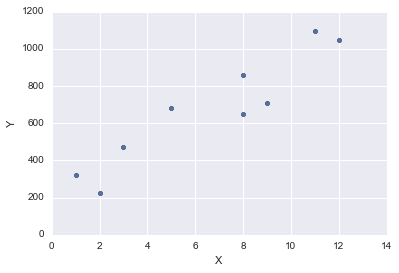

In [238]:
# aScatter plot
bus_df.plot(kind='scatter', x = 'X', y='Y')

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(bus_df.X,bus_df.Y)

In [31]:
predicted_y = slope*bus_df.X+intercept
print predicted_y

0     775.548415
1     562.794014
2     420.957746
3     846.466549
4     988.302817
5     350.039613
6     279.121479
7     775.548415
8    1059.220951
Name: X, dtype: float64


In [12]:
print "slope: ", slope
print "intercept: ", intercept

slope:  70.9181338028
intercept:  208.20334507


# b. Regression line

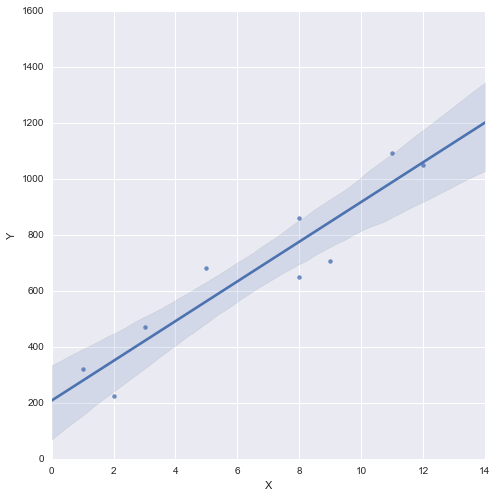

In [239]:

sns.lmplot('X','Y',bus_df,ci=95, size=7)

# c.total sum of squares

In [78]:
# total sum of square of Y
X_mean = bus_df['X'].mean()
print 'mean of X: ',X_mean

X_diff = np.array([(x-X_mean)**2 for x in bus_df.X])

X_TSS = X_diff.sum()
print "Total Sum of squares of X: ", X_TSS

# total sum of square of Y
Y_mean = bus_df['Y'].mean()
print 'mean of Y: ',Y_mean

Y_diff = np.array([(y-Y_mean)**2 for y in bus_df.Y])

Y_TSS = Y_diff.sum()
print "Total Sum of squares of Y: ", Y_TSS

mean of X:  6.55555555556
Total Sum of squares of X:  126.222222222
mean of Y:  673.111111111
Total Sum of squares of Y:  722016.888889


# d. sum of square about regression


In [49]:
y_ypred = np.array([(y - Y_pred)**2 for y,Y_pred in zip(bus_df['Y'],predicted_y)])
sum_about_reg = y_ypred.sum()

print "Sum of Squares about regression: ", sum_about_reg


Sum of Squares about regression:  87197.1540493


# e. sum of square due regression 


In [50]:
y_ymean = np.array([(y - Y_mean)**2 for y in predicted_y])
sum_due_reg = y_ymean.sum()

print "Sum of Squares due to regression: ", sum_due_reg

Sum of Squares due to regression:  634819.73484


# f. Total Sum of Squares = Sum of Squares due to regression + Sum of Squares about regression


In [53]:
print "Total Sum of squares of Y: ", Y_TSS
print "Sum of Squares due to regression + Sum of Squares about regression", sum_about_reg + sum_due_reg

Total Sum of squares of Y:  722016.888889
Sum of Squares due to regression + Sum of Squares about regression 722016.888889


# g)	Find a 95% confidence interval for the slope


SE = sb1 = sqrt [ Σ(yi - ŷi)2 / (n - 2) ] / sqrt [ Σ(xi - x)2 ]


In [217]:
SE = np.sqrt(sum_about_reg/7)
se_y = np.sqrt ((sum_about_reg/7) /X_TSS)

In [218]:
t_val1 =  stats.t.ppf(1-0.025, 7)

In [219]:
print "95% confidence interval of the slope is : ",(slope - t_val1*se_y, slope + t_val1*se_y)

95% confidence interval of the slope is :  (47.427411891347489, 94.408855714286304)


# h. Find a 90% confidence interval for the intercept


Var(b0) = σ2(1/n+ Average(X)2 /SXX)

In [220]:

X2 = (bus_df['X'].mean())**2
t2_val = stats.t.ppf(1-0.05, 7)

se_b0 = SE*np.sqrt((1.0/9 + X2/X_TSS))


In [222]:
print "90% confidence interval of the intercept is : ",(intercept - t2_val*se_b0, intercept + t2_val*se_b0)

90% confidence interval of the intercept is :  (66.106550628599507, 350.30013951224555)


# i.compute R^2

In [224]:
R_sqr = r_value ** 2
print "Value of R_sqr: ", R_sqr

Value of R_sqr:  0.879231143494


# j. Compute correlation between Maintenance Cost and Age


In [228]:
bus_df.corr()

,X,Y
X,1.000000,0.937673
Y,0.937673,1.000000


In [229]:
print "correlation is 0.937673"

correlation is 0.937673


# k. compare R^2 and Correlation

If we take square root of the R^2, it is same as correlation. So essetianly R-value is same as Correlation

In [233]:
np.sqrt(R_sqr)

0.93767326051976718

# l.Forecast the annual maintenance cost for a bus that is 4.5years old and one that is 7 years old.


In [241]:
y4 = intercept +   slope * 4.5
print "The annual maintenance cost of 4.5 years old bus should be around: ", y4

The annual maintenance cost of 4.5 years old bus should be around:  527.334947183


In [ ]:
y7 = intercept +   slope * 4.5
print "The annual maintenance cost of 4.5 years old bus should be around: ", y4